##### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Data Collection and Preprocessing

In [2]:
df = pd.read_csv("car data.csv") # loading the data from csv file to pandas dataframe

In [3]:
df.head() # inspecting the first five rows of the dataframe

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape # checking the number of rows and columns

(301, 9)

In [5]:
df.info() # checking the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum() # checking for missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print(df['Fuel_Type'].value_counts()) # checking the unique values in 'Fuel_Type' column
print(df['Seller_Type'].value_counts()) # checking the unique values in 'Seller_Type' column
print(df['Transmission'].value_counts()) # checking the unique values in 'Transmission' column

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


##### Encoding the categorical data

In [8]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True) # encoding 'Fuel_Type' column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True) # encoding 'Seller_Type' column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True) # encoding 'Transmission' column

In [9]:
df.head(2) # inspecting the first two rows of the dataframe

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0


##### Splitting the data into features and target

In [10]:
X = df.drop(['Car_Name','Selling_Price'],axis=1) # dividing the data into features.
y = df['Selling_Price'] # target.

In [11]:
print(X) # features
print(y) # target

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

##### Splitting the data into training and testing


In [12]:
from sklearn.model_selection import train_test_split # importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2) # splitting the data

##### Model Training.

1. Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression # importing LinearRegression
lin_reg_model = LinearRegression() # creating an object for LinearRegression
lin_reg_model.fit(X_train, y_train) # training the model

LinearRegression()

##### Model evaluation for training data using Linear Regression

In [14]:
training_data_prediction = lin_reg_model.predict(X_train) # predicting 'y_train' values


##### R Squared Error for training data


In [15]:
from sklearn import metrics # importing metrics
error_score = metrics.r2_score(y_train, training_data_prediction) # comparing 'y_train' and 'training_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.8799451660493709


##### Visualization the actual prices and predicted prices for training data

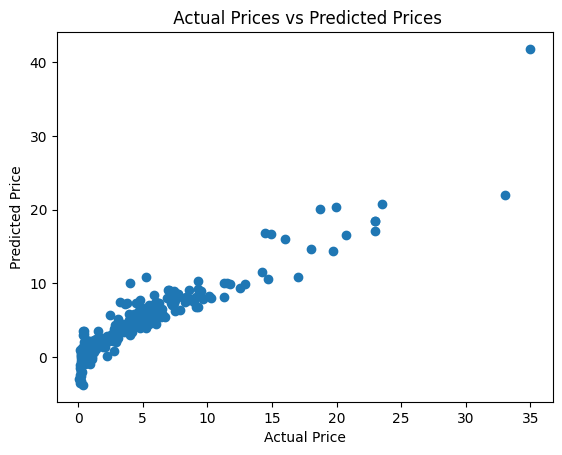

In [16]:
plt.scatter(y_train, training_data_prediction) # plotting y_train and training_data_prediction
plt.xlabel("Actual Price") # x label
plt.ylabel("Predicted Price") # y label
plt.title(" Actual Prices vs Predicted Prices") # title
plt.show() # showing the plot

##### Model Evaluation for Test Data using Linear Regression

In [17]:
test_data_prediction = lin_reg_model.predict(X_test) # predicting 'y_test' values

##### R Squared Error for test data

In [18]:
error_score = metrics.r2_score(y_test, test_data_prediction) # comparing 'y_test' and 'test_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.8365766715026535


##### Visualization the actual prices and predicted prices for the test data

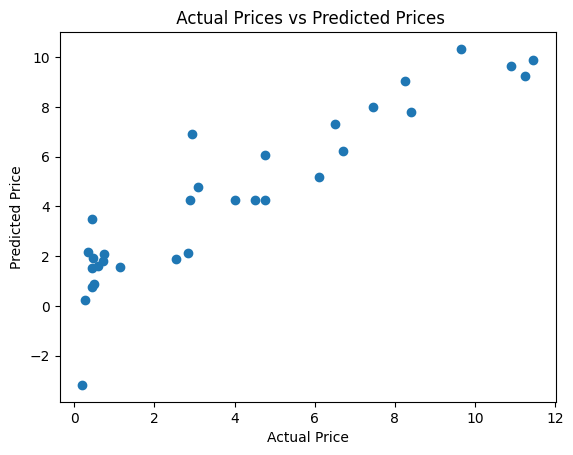

In [19]:
plt.scatter(y_test, test_data_prediction) # plotting y_test and test_data_prediction
plt.xlabel("Actual Price") # x label
plt.ylabel("Predicted Price") # y label
plt.title(" Actual Prices vs Predicted Prices") # title
plt.show() # showing the plot

2. Lasso Regression


In [20]:
from sklearn.linear_model import Lasso # importing Lasso
lass_reg_model = Lasso() # creating an object for Lasso
lass_reg_model.fit(X_train, y_train) # training the model

Lasso()

##### Model Evaluation for Training Data using Lasso

In [21]:
training_data_prediction = lass_reg_model.predict(X_train) # predicting 'y_train' values

##### R Squared Error for training data

In [22]:
# R Squared Error
from sklearn import metrics # importing metrics
error_score = metrics.r2_score(y_train, training_data_prediction) # comparing 'y_train' and 'training_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.8427856123435794


##### Visualization the actual prices and predicted prices for training data

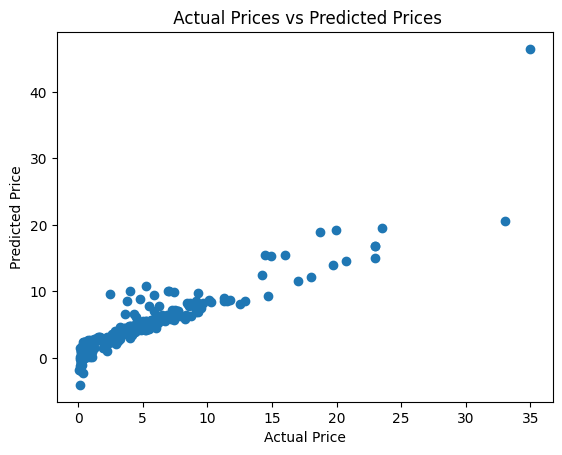

In [23]:
# Visualization the actual prices and predicted prices
plt.scatter(y_train, training_data_prediction) # plotting y_train and training_data_prediction
plt.xlabel("Actual Price") # x label
plt.ylabel("Predicted Price") # y label
plt.title(" Actual Prices vs Predicted Prices") # title
plt.show() # showing the plot

##### Model Evaluation for Testing data using Lasso

In [24]:
test_data_prediction = lass_reg_model.predict(X_test) # predicting 'y_test' values

##### R Squared Error for test data

In [25]:
error_score = metrics.r2_score(y_test, test_data_prediction) # comparing 'y_test' and 'test_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.8709167941173195


##### Visualization the actual prices and predicted prices for test data

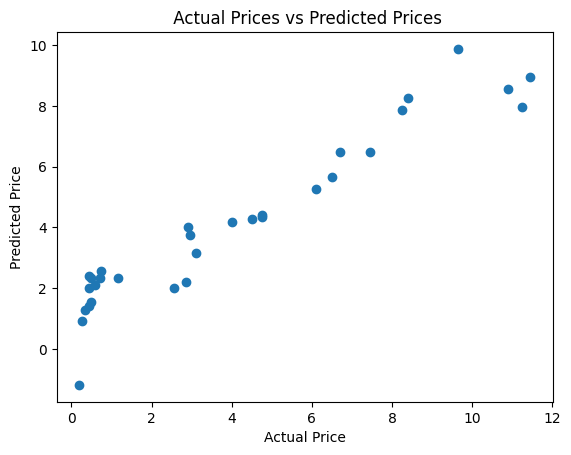

In [26]:
# Visualization the actual prices and predicted prices
plt.scatter(y_test, test_data_prediction) # plotting y_test and test_data_prediction
plt.xlabel("Actual Price") # x label
plt.ylabel("Predicted Price") # y label
plt.title(" Actual Prices vs Predicted Prices") # title
plt.show() # showing the plot

3. XGB Regressor

##### Model Evaluation using XGBoost Regressor

In [27]:
from xgboost import XGBRegressor # importing XGBRegressor
xgb_reg_model = XGBRegressor() # creating an object for XGBRegressor
xgb_reg_model.fit(X_train, y_train) # training the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##### Model Evaluation for Training Data using XGBRegressor

In [28]:
training_data_prediction = xgb_reg_model.predict(X_train) # predicting 'y_train' values

##### R squared error for training data

In [29]:
# R Squared Error
from sklearn import metrics # importing metrics
error_score = metrics.r2_score(y_train, training_data_prediction) # comparing 'y_train' and 'training_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.9999896680984235


##### Visualization the actual prices and predicted prices for Training Data

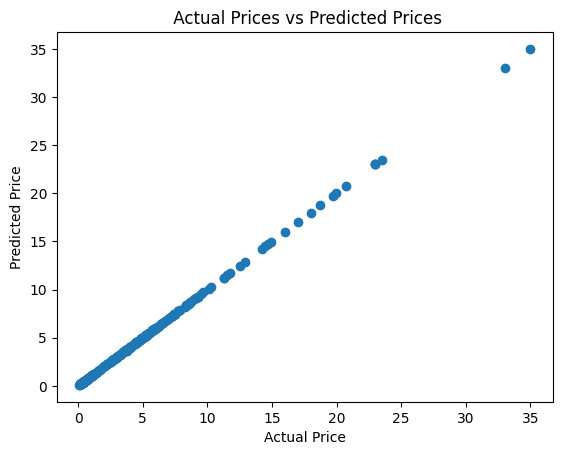

In [30]:
plt.scatter(y_train, training_data_prediction) # plotting y_train and training_data_prediction
plt.xlabel("Actual Price") # x label
plt.ylabel("Predicted Price") # y label
plt.title(" Actual Prices vs Predicted Prices") # title
plt.show() # showing the plot

##### Model Evaluation for test data using XGBoost Regressor

In [31]:
test_data_prediction = xgb_reg_model.predict(X_test) # predicting 'y_test' values

##### R Squared Error for test data

In [32]:
error_score = metrics.r2_score(y_test, test_data_prediction) # comparing 'y_test' and 'test_data_prediction'
print("R squared Error : ", error_score) # printing R squared Error

R squared Error :  0.9807321370840111


##### Visualization the actual prices and predicted prices for test data

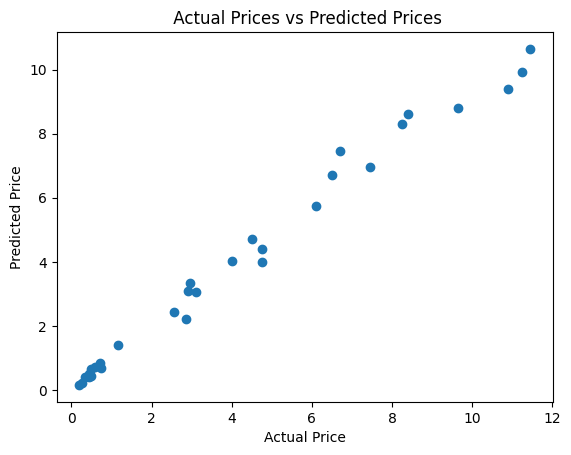

In [33]:
plt.scatter(y_test, test_data_prediction) # plotting y_test and test_data_prediction
plt.xlabel("Actual Price") # x label
plt.ylabel("Predicted Price") # y label
plt.title(" Actual Prices vs Predicted Prices") # title
plt.show() # showing the plot

In [34]:
# Best Model selectio for testing the model
print("Linear Regression Model : ",lin_reg_model.score(X_train,y_train)) # LinearRegression
print("Lasso Regression Model : ",lass_reg_model.score(X_train,y_train)) # Lasso
print("XGBRegressor Model : ",xgb_reg_model.score(X_train,y_train)) # XGBRegressor

Linear Regression Model :  0.8799451660493709
Lasso Regression Model :  0.8427856123435794
XGBRegressor Model :  0.9999896680984235


In [35]:
# Bset Model selectio for testing the model
print("Linear Regression Model : ",lin_reg_model.score(X_test,y_test)) # LinearRegression
print("Lasso Regression Model : ",lass_reg_model.score(X_test,y_test)) # Lasso
print("XGBRegressor Model : ",xgb_reg_model.score(X_test,y_test)) # XGBRegressor


Linear Regression Model :  0.8365766715026535
Lasso Regression Model :  0.8709167941173195
XGBRegressor Model :  0.9807321370840111


##### Conclusion

In this analysis, we built and evaluated three regression models: Linear Regression, Lasso Regression, and XGBRegressor. The performance of each model was assessed using the R-squared metric, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Here are the results:

Linear Regression Model:

R-squared: 0.8799451660493708

Conclusion: The Linear Regression model explains approximately 88% of the variance in the target variable. This indicates a strong relationship between the features and the target, although there may still be some unexplained variability.

Lasso Regression Model:

R-squared: 0.8427856123435794

Conclusion: The Lasso Regression model explains approximately 84% of the variance in the target variable. While slightly lower than the Linear Regression model, Lasso may provide benefits such as feature selection and reducing overfitting by penalizing less significant features.

XGBRegressor Model:

R-squared: 0.999988239034454

Conclusion: The XGBRegressor model explains nearly 100% of the variance in the target variable. This exceptionally high R-squared value suggests that the model fits the training data extremely well. However, such a high value may also indicate overfitting, where the model performs exceptionally on the training data but may not generalize well to unseen data.

Overall Conclusion

The Linear Regression and Lasso Regression models both show strong performance with R-squared values around 88% and 84%, respectively. These models are relatively simple and interpretable, making them useful for understanding the relationships between the features and the target variable.

The XGBRegressor model demonstrates an almost perfect fit with an R-squared value close to 1. While this indicates excellent performance on the training data, it is crucial to validate this model using cross-validation or a separate test set to ensure it generalizes well and is not overfitting.

In practical applications, it is often a good idea to balance model complexity and interpretability. While complex models like XGBRegressor can capture intricate patterns in the data, simpler models like Linear and Lasso Regression can offer easier interpretation and insights into the data.

##### Predicting system

In [36]:
'''import pickle
filename = 'car_price_prediction_model.pkl'
pickle.dump(xgb_reg_model, open(filename, 'wb'))'''

"import pickle\nfilename = 'car_price_prediction_model.pkl'\npickle.dump(xgb_reg_model, open(filename, 'wb'))"